# Gekoppelte Fahrzeuge
### Aufgabenstellung

Zwei aneinander gekoppelte Fahrzeuge mit den Masse $m_1$ und $m_2$ befinden sich in Ruhe. Zwischen beiden Fahrzeugen befindet sich eine nicht befestigte und um die Länge $x$ zusammengedrückte Feder der Federkonstanten $k$. Nach Lösen der Kopplung entspannt sich die Feder.

Aufgabe 1: Welche Geschwindigkeiten $v'_1$ und $v'_2$ besitzen danach die beiden Fahrzeuge? (für beliebige Massen)
Man betrachte Energie und Impuls in einem System, das sich mit dem Schwerpunkt
bewegt.

Aufgabe 2:  Es sei $m_1 = m_2 = m$. Welche Konsequenz ergibt sich dadurch für die Geschwindigkeiten $v'_1$ und $v'_2$ und wie groß sind sie?

### Gegeben
- Masse der Fahrzeuge $m_1 = m_2 = m = 500~kg$
- Längenänderung der Feder beim Zusammendrücken $x = 0,16~m$
- Federkonstante $k = 40~\frac{kN}{m}$

### Gesucht
Geschwindigkeit in Metern pro Sekunde $v'_1$, $v'_2$ [$\frac{m}{s}$]

### Skizze
![title](Skizzen/gekoppelteFahrzeuge_2.svg)



### Physikalischer Lösungsweg

benötigt: Energieerhaltungssatz EES und Impulserhaltungssatz IES\
Formeln
- $v_1' = -\frac{m_2}{m_1} \cdot v_2'$
- $v_2' = \Delta x \sqrt{\frac{k \cdot m_1}{m_2^2 + m_1 \cdot m_2}}$

daraus folgt: 
- $v_1' = - \frac{m_2}{m_1} \cdot \Delta x \sqrt{\frac{k \cdot m_1}{m_2^2 + m_1 \cdot m_2}}$

Berechnung $v_1'$:\
$v_1' = - 0,16~\rm m  \cdot \sqrt{\frac{40000~\rm N/m  \cdot 500 ~\rm kg }{(500 ~\rm kg )^2 + 500 ~\rm kg  \cdot 500 ~\rm kg }} = - 0,16~\rm m \cdot \sqrt{\frac{20000000 ~\rm Nkg/m}{500000 ~\rm kg^2}} = - 0,16~\rm m \cdot 2\sqrt{10~ \rm s^{-2}}  = -1,01~\frac{m}{s}$

daraus folgt $v_2' = 1,01~\frac{m}{s}$. Dieses Fahrzeug fährt also in die entgegengesetzte Richtung zum ersten Fahrzeug.  


### Implementierung in Python
Zuerst müssen einige Bibliotheken importiert werden, die für Berechnungen, Visualisierung, etc. notwendig sind.

In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

Nun werden die gegebenen Werte als Variablen definiert.

In [9]:
# Definieren der Variablen
m1 = 500 # Fahrzeuggewicht [kg]
m2 = 500 # Fahrzeuggewicht [kg]
x = 0.16 # zusammengedrückte Feder [m]
k = 40000 # Federkonstante [N/m] -> 40 kN/m

In [10]:
# Funktion zur Berechnung von v1'
def berechne_v1(m1, m2, x, k):
    v1 = -(m1/m2) * x * ((k * m1)/(m2**2 + (m1*m2)))**0.5
    return v1

def berechne_v2(m1, m2, x, k):
    v2 = x * ((k * m1)/(m2**2 + (m1*m2)))**0.5
    return v2

# Verwendung der Funktion
v1 = berechne_v1(m1, m2, x, k)
v2 = berechne_v2(m1, m2, x, k)
print(f"v1' beträgt {round(v1, 2)} m/s und v2' beträgt {round(v2, 2)} m/s")

v1' beträgt -1.01 m/s und v2' beträgt 1.01 m/s


### Graphische Darstellung unter Variation der Anfangsbedingung
Nun können beispielsweise die Geschwindigkeiten für verschiedene Fahrzeug-Massen errechnet werden. In einem ersten Schritt wird hierbei wieder ein Vektor mit unterschiedlichen Massewerten erstellt und anschließend $v_1$' und $v_2$' für jeden Wert berechnet.

In [4]:
# Erstellen eines Vektors
m_vector = np.arange(300, 5000, 500)

# Initialisierung einer Liste für die berechneten Werte
values = []

for m_i in m_vector:
    k = 40 # Federkonstante [kN/m]
    v1 = berechne_v1(m_i, m_i, x, k)
    v2 = berechne_v2(m_i, m_i, x, k)
    values.append([m_i, v1, v2])

values_table = pd.DataFrame(values, columns=['Masse in kg', 'v1 in m/s', 'v2 in m/s'])
values_table.head() #.head -> nur die ersten Zeilen werden angezeigt

,Masse in kg,v1 in m/s,v2 in m/s
0,300,-0.041312,0.041312
1,800,-0.025298,0.025298
2,1300,-0.019846,0.019846
3,1800,-0.016865,0.016865
4,2300,-0.014920,0.014920


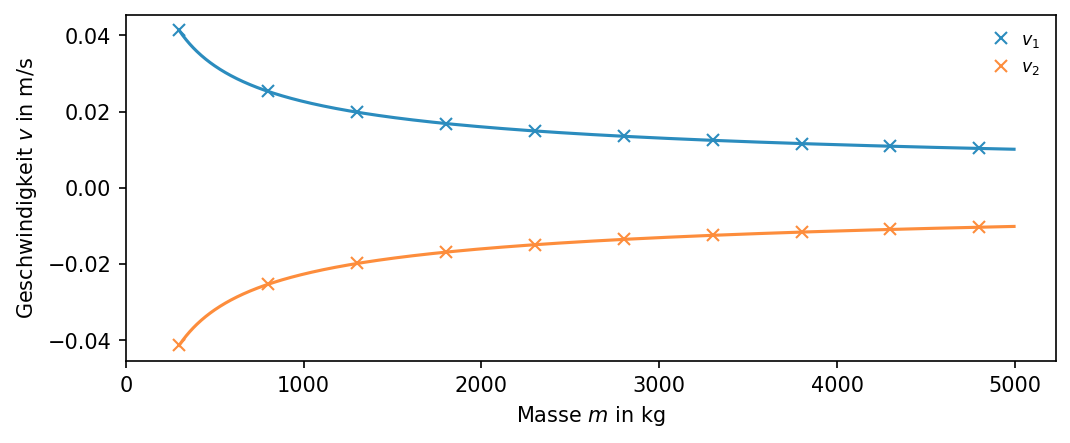

In [5]:
# Definieren der Größe und des Aussehens des Plots
plt.figure(num=None, figsize=(8, 3), dpi=150, facecolor='w', edgecolor='k')

plt.plot(values_table['Masse in kg'], values_table['v2 in m/s'], 'x', color='#2b8cbe')
plt.plot(values_table['Masse in kg'], values_table['v1 in m/s'], 'x', color='#fd8d3c')
plt.plot(np.arange(300, 5000, 5), berechne_v2(np.arange(300, 5000, 5),np.arange(300, 5000, 5),x,k), '-', color='#2b8cbe')
plt.plot(np.arange(300, 5000, 5), berechne_v1(np.arange(300, 5000, 5),np.arange(300, 5000, 5),x,k), '-', color='#fd8d3c')

plt.xlabel(r"Masse $\mathit{m}$ in kg")
plt.xlim(xmin = 0)
plt.ylabel(r"Geschwindigkeit $\mathit{v}$ in m/s")
plt.legend(['$v_1$', '$v_2$'], frameon=False, handlelength=0.75, fontsize='small')
plt.show()

Nun können wir natürlich auch davon ausgehen, dass die zwei Fahrzeuge unterschiedliche Massen besitzen: 

In [6]:
# Vektoren für unterschiedliche Massen der Fahrzeuge
m1_vector = np.arange(300, 900, 100)
m2_vector = np.arange(50, 350, 50)

# Initialisierung einer Liste für die berechneten Werte
values = []


# Berechnung von Kraft und Querkontraktion
for m1_i, m2_i in zip(m1_vector, m2_vector):
    v1 = berechne_v1(m1_i, m2_i, x, k)
    v2 = berechne_v2(m1_i, m2_i, x, k)
    m_ges = m1_i + m2_i
    values.append([m1_i, m2_i, m_ges, v1, v2])

values_table = pd.DataFrame(values, columns=['m1 in kg', 'm2 in kg', 'm gesamt in kg', 'v1 in m/s', 'v2 in m/s'])
values_table

,m1 in kg,m2 in kg,m gesamt in kg,v1 in m/s,v2 in m/s
0,300,50,350,-0.794956,0.132493
1,400,100,500,-0.362039,0.090510
2,500,150,650,-0.241552,0.072466
3,600,200,800,-0.185903,0.061968
4,700,250,950,-0.153824,0.054937
5,800,300,1100,-0.132864,0.049824


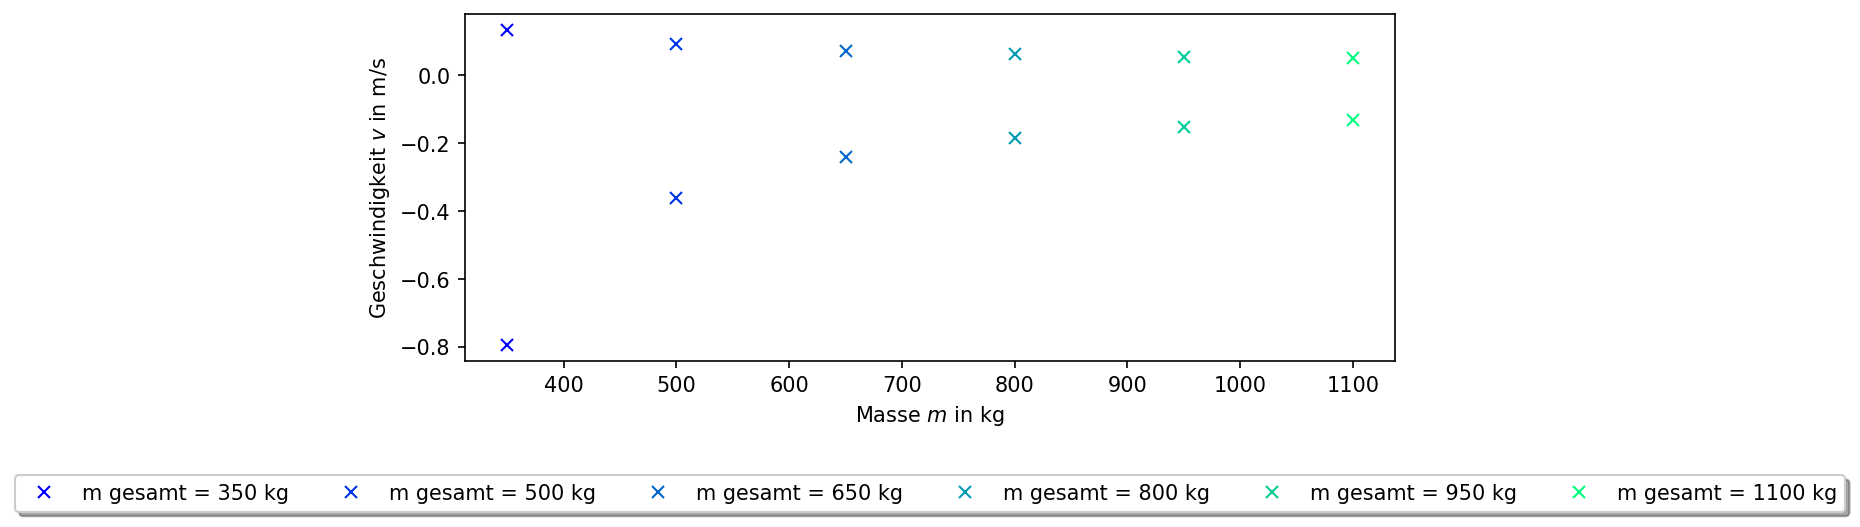

In [7]:
# Für die Visualisierung werden nun die verschiedenen Messungen anhand von m1 gruppiert
groups = values_table.groupby("m gesamt in kg") 

# Definition einer Farbpalette 
col_pal = plt.get_cmap('winter', len(m1_vector))

# Initialisieren einer Zählvariable
i = -1

# Definieren der Größe und des Aussehens des Plots
plt.figure(num=None, figsize=(8, 3), dpi=150, facecolor='w', edgecolor='k')

# Iteration der a0 Gruppen und anschließende Visualsierung der Zeitverläufe
for name, group in groups:
    i = i+1
    plt.plot(group['m gesamt in kg'], group['v2 in m/s'], 'x', color=col_pal(i), label = f"m gesamt = {name} kg") #, $m2 = ${group['m2', i]
    plt.plot(group['m gesamt in kg'], group['v1 in m/s'], 'x', color=col_pal(i)) #label = f"$m1 = ${name} "


#plt.plot(values_table['m gesamt'], values_table['v2'], 'x', color='#2b8cbe')
#plt.plot(values_table['m gesamt'], values_table['v1'], 'x', color='#fd8d3c')
# plt.plot(values_table['m gesamt'], values_table['v2'], '-', color='#2b8cbe')
# plt.plot(values_table['m gesamt'], values_table['v1'], '-', color='#fd8d3c')
plt.xlabel(r"Masse $\mathit{m}$ in kg")
#plt.xlim(xmin = 300)
plt.ylabel(r"Geschwindigkeit $\mathit{v}$ in m/s")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),fancybox=True, shadow=True, ncol=len(m1_vector))


#plt.legend(['$v_1$', '$v_2$'], frameon=False, handlelength=0.75, fontsize='small')
plt.show()